# Extragalactic Astronomy Homework 1  

**Author:** Nicholas Faucher  

**Problem:** Light II Numerics and Data Exercise 1  
Download an optical spectrum of an A star. Identify all Balmer absorption lines that are apparent in that spectrum.  

**Solution:**  
Data downloaded from https://doi.org/10.5281/zenodo.321394  
Referenced in https://iopscience.iop.org/article/10.3847/1538-4365/aa656d/pdf  
Fluxes are normalized to the flux at 8000 Å  

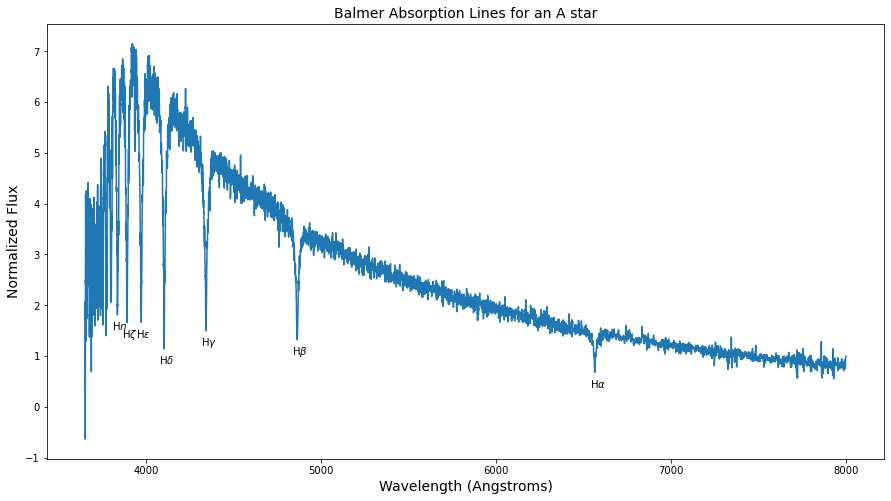

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from astropy.io import fits

def find_nearest(array, value):
    index = (np.abs(array - value)).argmin()
    return index

def find_local_min(array, index):
	min_index = np.argmin(array[index-25:index+26])
	return min_index + index - 25

balmer_series = np.array((6562.79, 4861.35, 4340.472, 4101.734, 3970.075, 3889.064, 3835.397))
balmer_labels = [r'H$\alpha$', r'H$\beta$', r'H$\gamma$', r'H$\delta$', r'H$\epsilon$', r'H$\zeta$', r'H$\eta$']

hdul = fits.open('A0.fits')
data = hdul[1].data
loglam = data['Loglam']
lam = 10**loglam
flux = data['Flux']

mask = lam < 8000

plt.figure(figsize=(15,8))

plt.plot(lam[mask],flux[mask])

for i in range(len(balmer_series)):
	index = find_nearest(lam, balmer_series[i]) # finds the closest wavelength index to current balmer series
	min_index = find_local_min(flux, index) # finds the local minimum near current index
	plt.text(lam[min_index]-30,flux[min_index]-0.3, balmer_labels[i], fontsize=10) # puts the appropriate label near each local minimum

plt.xlabel('Wavelength (Angstroms)', fontsize=14)
plt.ylabel('Normalized Flux', fontsize=14)
plt.title('Balmer Absorption Lines for an A star', fontsize=14)

plt.savefig('balmer.png', dpi=300)

plt.show()
